In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

df = pd.read_csv('pokemon.csv')

In [2]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info(memory_usage = 'deep' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 194.7 KB


In [4]:
df.drop(columns = '#', inplace = True)

In [5]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
df['Name'].nunique()

800

In [7]:
df['Type 1'].nunique()

18

In [8]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [9]:
df['Type 2'].nunique()

18

In [10]:
df['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [11]:
df.fillna(value = 'None', inplace = True)

In [12]:
df['Type 1'] = df['Type 1'].astype('category')
df['Type 2'] = df['Type 2'].astype('category')

In [13]:
df.info(memory_usage = 'deep' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        800 non-null    object  
 1   Type 1      800 non-null    category
 2   Type 2      800 non-null    category
 3   Total       800 non-null    int64   
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    int64   
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(2), int64(8), object(1)
memory usage: 107.4 KB


In [14]:
duplicates = df.duplicated(keep = False)
df[duplicates]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [15]:
df.set_index('Name', inplace = True)

In [16]:
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,None,309,39,52,43,60,50,65,1,False


In [17]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Top 10 pokemon with the best total

In [18]:
df.sort_values(by='Total', ascending = False).head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True
MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
KyogrePrimal Kyogre,Water,None,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,Normal,None,720,120,120,120,120,120,120,4,True
KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False


# Top 10 pokemon with the worst total

In [19]:
df.sort_values(by='Total').head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Sunkern,Grass,None,180,30,30,30,30,30,30,2,False
Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
Kricketot,Bug,None,194,37,25,41,25,41,25,4,False
Wurmple,Bug,None,195,45,45,35,20,30,20,3,False
Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
Caterpie,Bug,None,195,45,30,35,20,20,45,1,False
Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
Scatterbug,Bug,None,200,38,35,40,27,25,35,6,False
Magikarp,Water,None,200,20,10,55,15,20,80,1,False


# Top 10 pokemon with the best HP

In [20]:
df.sort_values(by='HP', ascending = False).head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Blissey,Normal,None,540,255,10,10,75,135,55,2,False
Chansey,Normal,None,450,250,5,5,35,105,50,1,False
Wobbuffet,Psychic,None,405,190,33,58,33,58,33,2,False
Wailord,Water,None,500,170,90,45,90,45,60,3,False
Alomomola,Water,None,470,165,75,80,40,45,65,5,False
Snorlax,Normal,None,540,160,110,65,65,110,30,1,False
Drifblim,Ghost,Flying,498,150,80,44,90,54,80,4,False
Slaking,Normal,None,670,150,160,100,95,65,100,3,False
GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True


# Top 10 pokemon with the best Attack

In [21]:
df.sort_values(by='Attack', ascending = False).head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
DeoxysAttack Forme,Psychic,None,600,50,180,20,180,20,150,3,True
KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
BanetteMega Banette,Ghost,None,555,64,165,75,93,83,75,3,False


# Top 10 pokemon with the best Defense

In [22]:
df.sort_values(by='Defense', ascending = False).head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
AggronMega Aggron,Steel,None,630,70,140,230,60,80,50,3,False
Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
Regirock,Rock,None,580,80,100,200,50,100,50,3,True
Avalugg,Ice,None,514,95,117,184,44,46,28,6,False
Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False


# Top 10 pokemon with the best Sp. Atk

In [23]:
df.sort_values(by='Sp. Atk', ascending = False).head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True
KyogrePrimal Kyogre,Water,None,770,100,150,90,180,160,90,3,True
DeoxysAttack Forme,Psychic,None,600,50,180,20,180,20,150,3,True
RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
AlakazamMega Alakazam,Psychic,None,590,55,50,65,175,95,150,1,False
KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
GardevoirMega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3,False


# Top 10 pokemon with the best Sp. Def

In [24]:
df.sort_values(by='Sp. Def', ascending = False).head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
Regice,Ice,None,580,80,50,100,100,200,50,3,True
DeoxysDefense Forme,Psychic,None,600,50,70,160,70,160,90,3,True
KyogrePrimal Kyogre,Water,None,770,100,150,90,180,160,90,3,True
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
Florges,Fairy,None,552,78,65,68,112,154,75,6,False
Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
Probopass,Rock,Steel,525,60,55,145,75,150,40,4,False
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True


# Top 10 pokemon with the best Speed

In [25]:
df.sort_values(by='Speed', ascending = False).head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
DeoxysSpeed Forme,Psychic,None,600,50,95,90,95,90,180,3,True
Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
DeoxysNormal Forme,Psychic,None,600,50,150,50,150,50,150,3,True
AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
AlakazamMega Alakazam,Psychic,None,590,55,50,65,175,95,150,1,False
DeoxysAttack Forme,Psychic,None,600,50,180,20,180,20,150,3,True
BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
Accelgor,Bug,None,495,80,70,40,100,60,145,5,False


# Ratio of attack to total

<AxesSubplot:xlabel='Attack'>

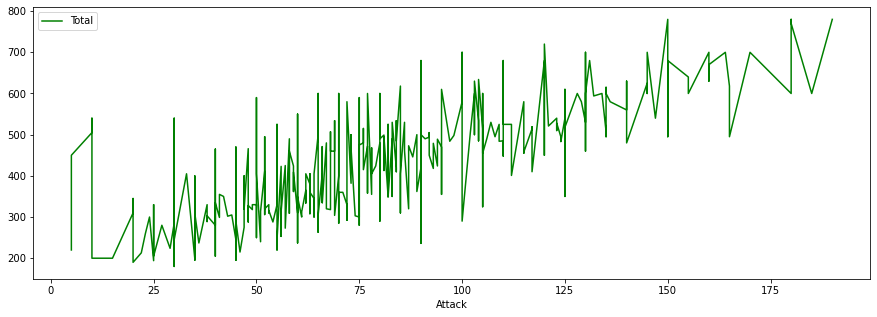

In [26]:
df.sort_values(by='Attack', inplace = True)
df.plot(y = 'Total', x = 'Attack', figsize = (15,5), color = 'g')

# Standard deviation of statistics

<AxesSubplot:>

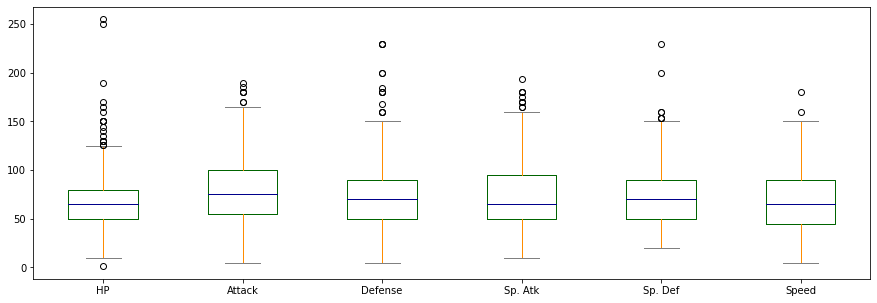

In [27]:
df_std = df.drop(columns = ['Total', 'Generation'])
color = dict(boxes = 'DarkGreen', whiskers = 'DarkOrange', medians = 'DarkBlue', caps = 'Gray')
df_std.plot(kind = 'box', color = color, figsize = (15,5))

# Percentage amount of legendary and non-legendary pokemon

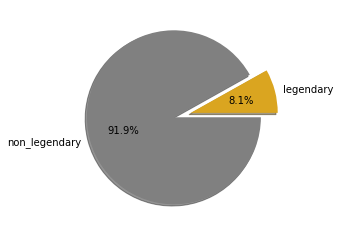

In [28]:
legendary = df.loc[df['Legendary']==True]
non_legendary = df.loc[df['Legendary']==False]
y = [len(legendary),len(non_legendary)]
mylabels = ['legendary', 'non_legendary']
mycolors = ['#DAA520', '#808080']

plt.pie(y, labels = mylabels, autopct='%1.1f%%', colors = mycolors, shadow = True, explode = (0.1, 0.1))
plt.show() 

# Comparison the average number of points in legendary and non-legendary pokemons

In [29]:
comparison = {
    'Type': ['legendary', 'non_legendary'],
    'Total_mean': [legendary['Total'].mean(), non_legendary['Total'].mean()]
}
Comparison = pd.DataFrame(data=comparison)
Comparison.pivot_table(values = 'Total_mean', columns = 'Type')

Type,legendary,non_legendary
Total_mean,637.384615,417.213605


<AxesSubplot:ylabel='Frequency'>

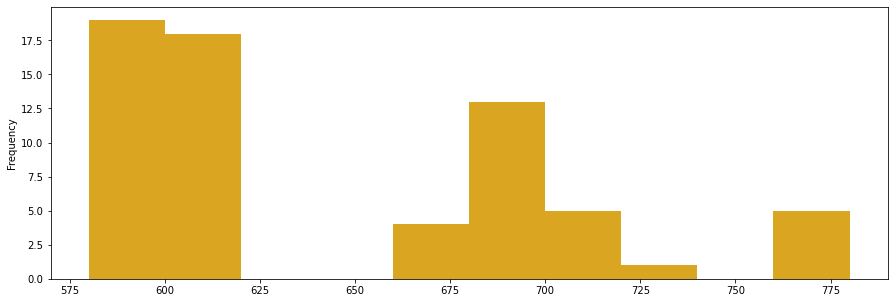

In [30]:
legendary['Total'].plot(kind = 'hist', figsize = (15,5), color = '#DAA520')

<AxesSubplot:ylabel='Frequency'>

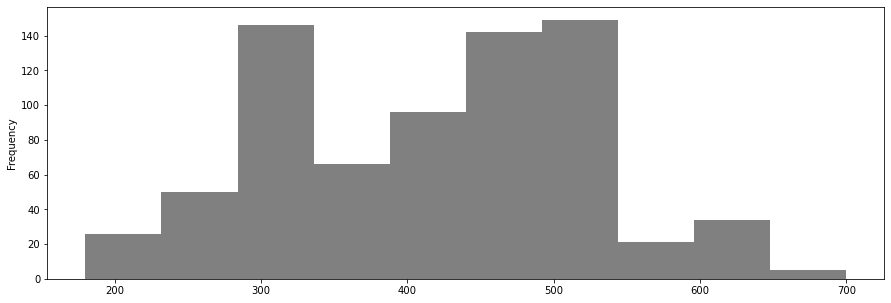

In [31]:
non_legendary['Total'].plot(kind = 'hist', figsize = (15,5), color = '#808080')

# Percentage amount by type 1 of pokemon

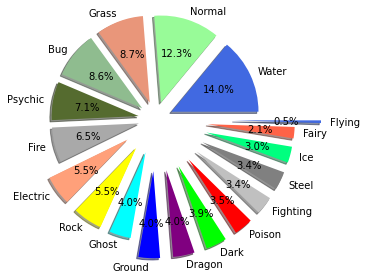

In [32]:
Group_1 = df['Type 1'].value_counts()
y = Group_1.values
mylabels = Group_1.index
color = ['#4169E1', '#98FB98', '#E9967A', '#8FBC8F', '#556B2F', '#A9A9A9', '#FFA07A', '#FFFF00', '#00FFFF', '#0000FF', '#800080', '#00FF00', '#FF0000', '#C0C0C0', '#808080','#00FF7F','#FF6347']


plt.pie(y, labels = mylabels, colors = color, autopct='%1.1f%%',explode = (0.2,0.2,0.2,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.9), shadow = True)
plt.show() 

(0.0, 100.0, 0.0, 100.0)

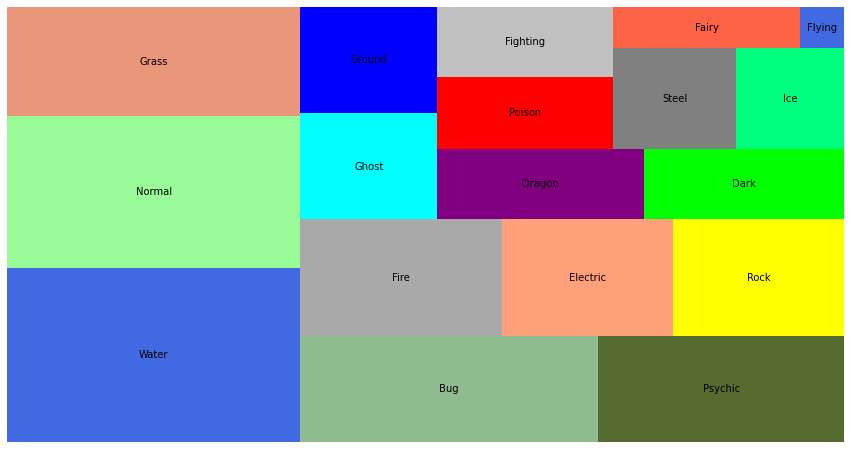

In [33]:
data = Group_1.values
label = Group_1.index
color = ['#4169E1', '#98FB98', '#E9967A', '#8FBC8F', '#556B2F', '#A9A9A9', '#FFA07A', '#FFFF00', '#00FFFF', '#0000FF', '#800080', '#00FF00', '#FF0000', '#C0C0C0', '#808080','#00FF7F','#FF6347']

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
squarify.plot(sizes = data, label = Group_1.index, color = color)
plt.axis("off")


# Percentage amount by type 2 of pokemon

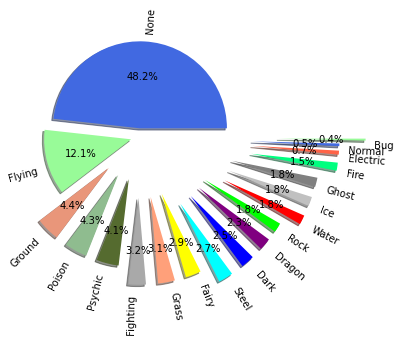

In [34]:
Group_2 = df['Type 2'].value_counts()
y = Group_2.values
mylabels = Group_2.index
color = ['#4169E1', '#98FB98', '#E9967A', '#8FBC8F', '#556B2F', '#A9A9A9', '#FFA07A', '#FFFF00', '#00FFFF', '#0000FF', '#800080', '#00FF00', '#FF0000', '#C0C0C0', '#808080','#00FF7F','#FF6347']


plt.pie(y, labels = mylabels, autopct='%1.1f%%', colors = color, rotatelabels = 90, explode = (0.1,0.1,0.5,0.5,0.5,0.7,0.7,0.7,0.9,0.9,0.9,0.9,1.1,1.1,1.1,1.3,1.3,1.3,1.6), shadow = True)
plt.show() 

(0.0, 100.0, 0.0, 100.0)

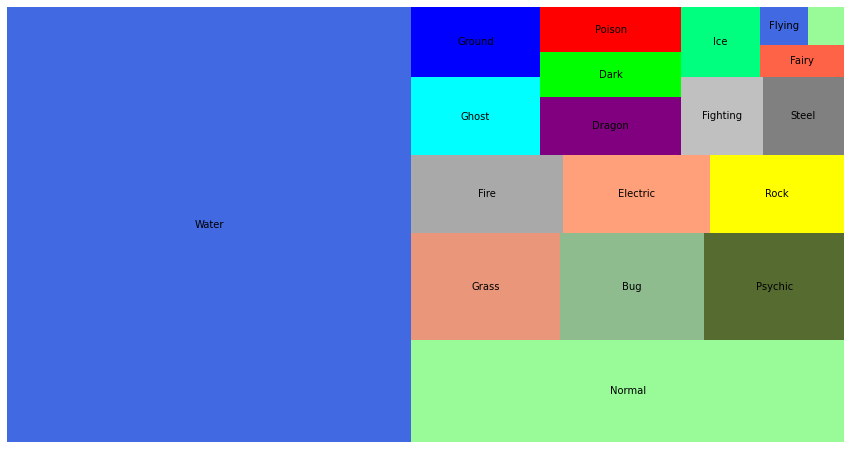

In [35]:
data = Group_2.values
label = Group_2.index
color = ['#4169E1', '#98FB98', '#E9967A', '#8FBC8F', '#556B2F', '#A9A9A9', '#FFA07A', '#FFFF00', '#00FFFF', '#0000FF', '#800080', '#00FF00', '#FF0000', '#C0C0C0', '#808080','#00FF7F','#FF6347']

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
squarify.plot(sizes = data, label = Group_1.index, color = color)
plt.axis("off")

# Total power by type 1

In [36]:
Type_1 = df.groupby(by='Type 1')

In [37]:
Type_1 = Type_1.mean().sort_values(by='Total')

<AxesSubplot:ylabel='Type 1'>

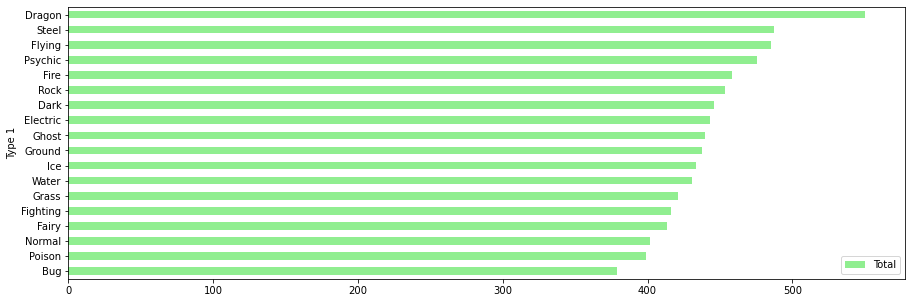

In [38]:
Type_1.plot(kind = 'barh',y = 'Total', figsize = (15,5), color = '#90EE90')

<AxesSubplot:>

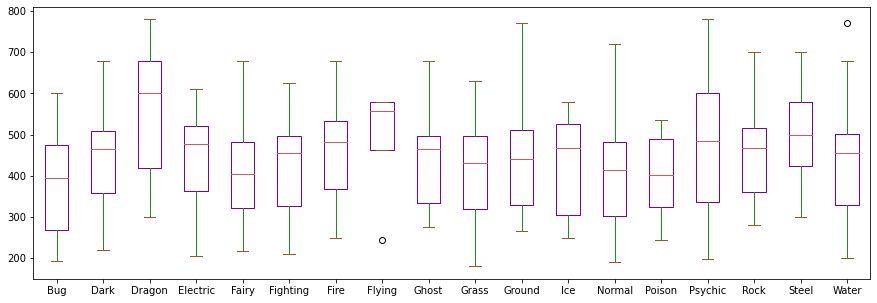

In [39]:
df_pivot = df.pivot_table(values = 'Total', index = 'Name', columns = 'Type 1')
color = dict(boxes = '#8B008B', whiskers = '#228B22', medians = '#CD5C5C', caps = '#A0522D')
df_pivot.plot(kind = 'box', color = color, figsize = (15,5))

# Total power by type 2

In [40]:
Type_2 = df.groupby(by='Type 2')

In [41]:
Type_2 = Type_2.mean().sort_values(by='Total')

<AxesSubplot:ylabel='Type 2'>

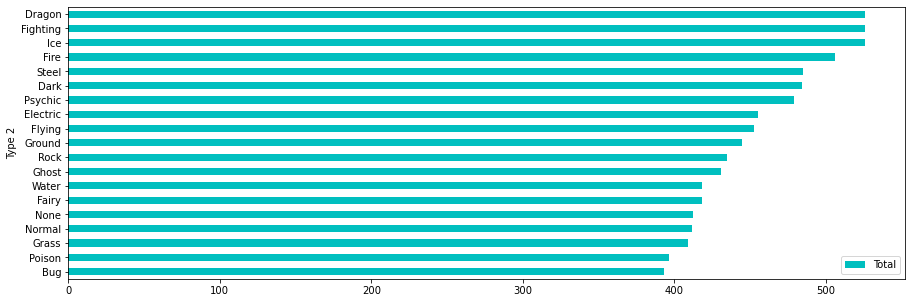

In [42]:
Type_2.plot(kind = 'barh',y = 'Total', figsize = (15,5), color = 'c')

<AxesSubplot:>

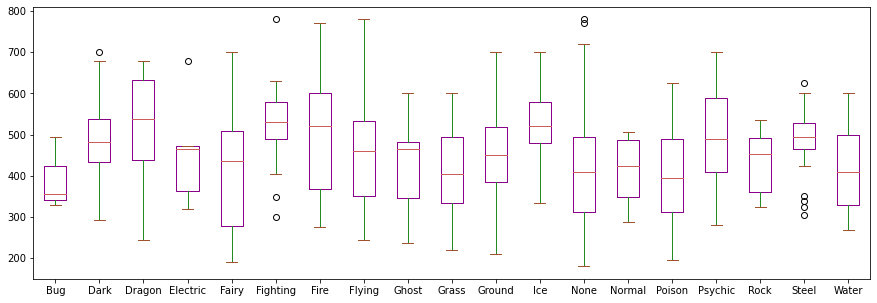

In [43]:
df_pivot = df.pivot_table(values = 'Total', index = 'Name', columns = 'Type 2')
color = dict(boxes = '#8B008B', whiskers = '#228B22', medians = '#CD5C5C', caps = '#A0522D')
df_pivot.plot(kind = 'box', color = color, figsize = (15,5))

# Total power by generation

In [44]:
Type_2 = df.groupby(by='Generation')

In [45]:
Type_2 = Type_2.mean().sort_values(by='Total')

<AxesSubplot:ylabel='Generation'>

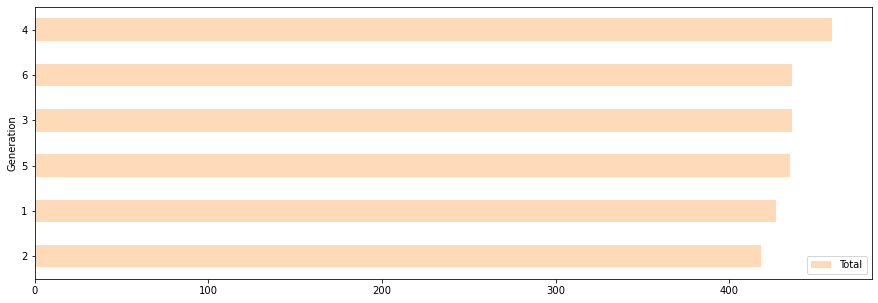

In [46]:
Type_2.plot(kind = 'barh',y = 'Total', figsize = (15,5), color = '#FFDAB9')

<AxesSubplot:>

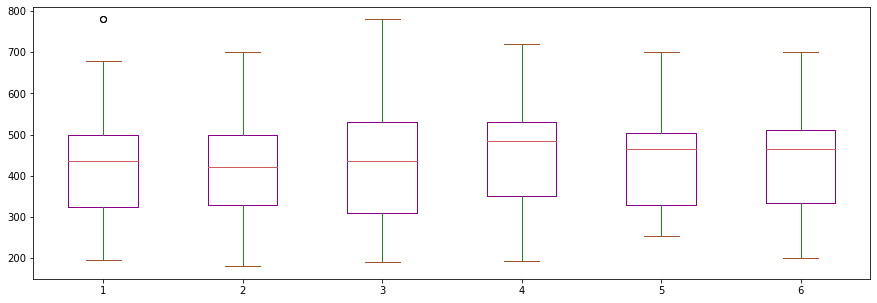

In [47]:
df_pivot = df.pivot_table(values = 'Total', index = 'Name', columns = 'Generation')
color = dict(boxes = '#8B008B', whiskers = '#228B22', medians = '#CD5C5C', caps = '#A0522D')
df_pivot.plot(kind = 'box', color = color, figsize = (15,5))

In [48]:
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Happiny,Normal,None,220,100,5,5,15,65,30,4,False
Chansey,Normal,None,450,250,5,5,35,105,50,1,False
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
Blissey,Normal,None,540,255,10,10,75,135,55,2,False
Magikarp,Water,None,200,20,10,55,15,20,80,1,False


# Machine Learning

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np


# Separate features and labels
features = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
label = 'Legendary'
X, y = df[features].values, df[label].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))


Training cases: 560
Test cases: 240


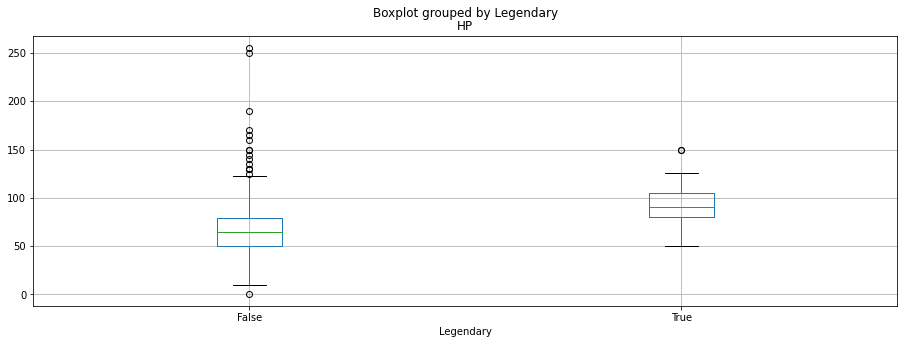

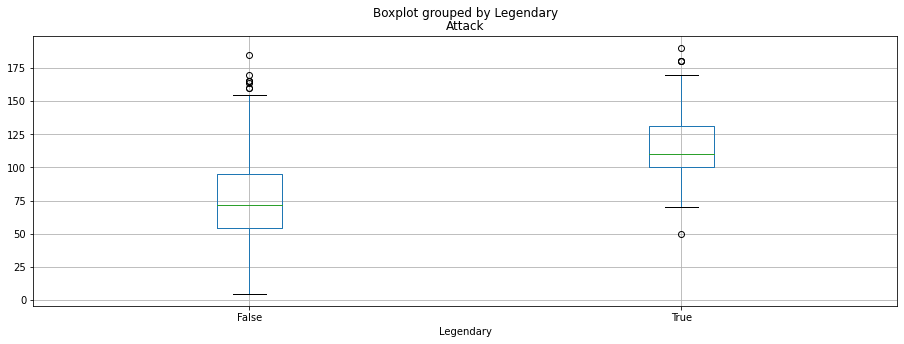

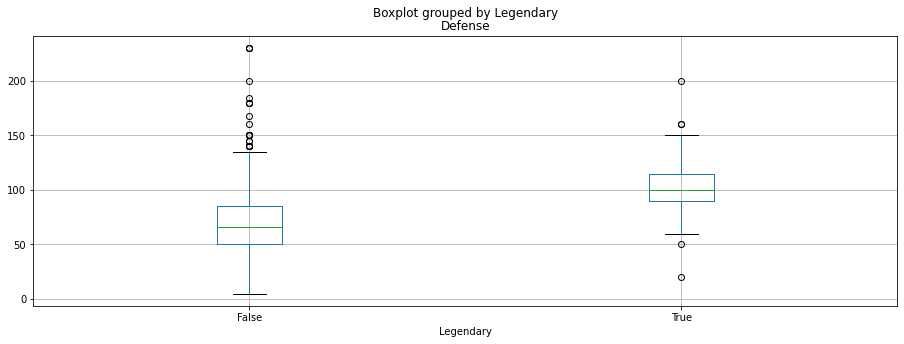

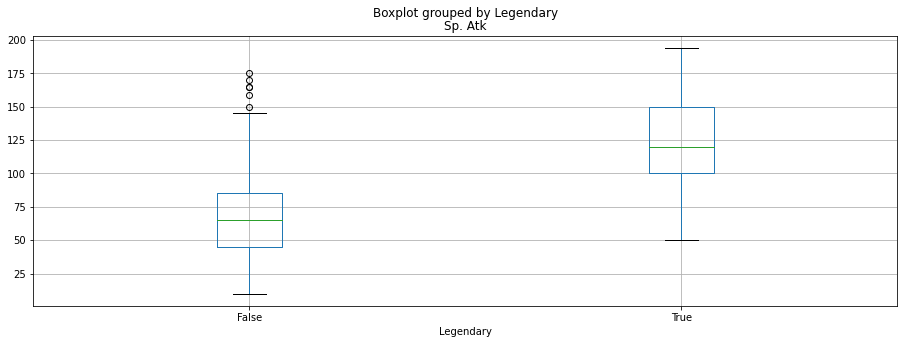

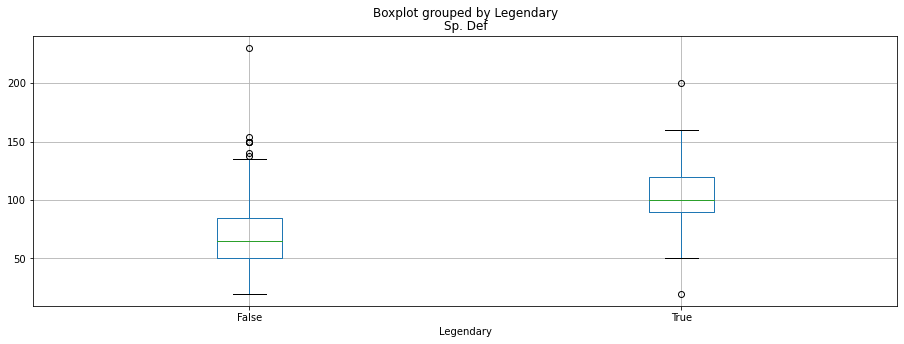

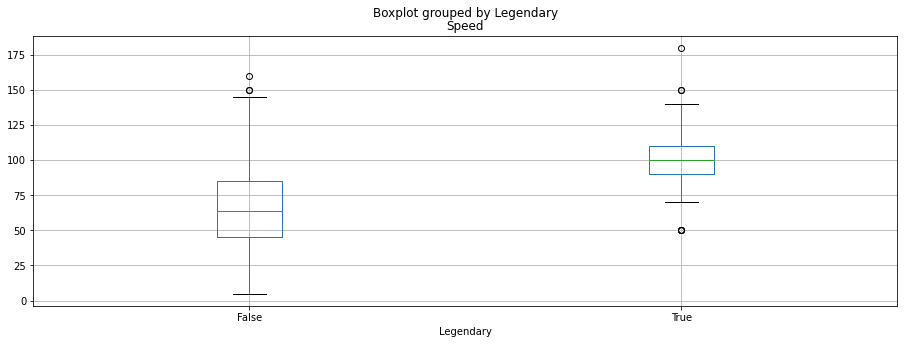

In [52]:
for col in features:
    df.boxplot(column=col, by='Legendary', figsize=(15,5))
    plt.title(col)
plt.show()

In [54]:
# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
predictions = model.predict(X_test)
print('Predicted labels: {} \nActual labels: {} \n\nAccuracy: {}'.format(predictions, y_test, accuracy_score(y_test, predictions)))



Predicted labels: [False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False  True False False False False False
  True False False False False  True False False False  True False False
 False False  True False False False  True False False False  True  True
 False False False False False False False False False False False False
 False False False False  True False False  True False False False False
 False False False  True False False False False False False False False
 False False  True False False False False False False False False False
 False False  True False  True  True False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False Fa

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.95      0.96      0.96       215
        True       0.62      0.60      0.61        25

    accuracy                           0.92       240
   macro avg       0.79      0.78      0.78       240
weighted avg       0.92      0.92      0.92       240



In [56]:
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.625
Overall Recall: 0.6


In [57]:
# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[206   9]
 [ 10  15]]


In [58]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[9.99631547e-01 3.68453453e-04]
 [9.99191318e-01 8.08681672e-04]
 [9.99919652e-01 8.03481406e-05]
 [9.99863039e-01 1.36960991e-04]
 [9.99942891e-01 5.71093028e-05]
 [9.99992981e-01 7.01888723e-06]
 [9.94604720e-01 5.39527953e-03]
 [5.39861943e-01 4.60138057e-01]
 [9.99593895e-01 4.06104625e-04]
 [9.99088819e-01 9.11181348e-04]
 [9.99999434e-01 5.66023907e-07]
 [9.99075788e-01 9.24211534e-04]
 [2.35138702e-01 7.64861298e-01]
 [1.27537607e-01 8.72462393e-01]
 [9.99989644e-01 1.03563563e-05]
 [9.99993956e-01 6.04399377e-06]
 [9.98970440e-01 1.02955955e-03]
 [9.95656114e-01 4.34388574e-03]
 [9.99824534e-01 1.75465751e-04]
 [9.99928721e-01 7.12785182e-05]
 [9.78618156e-01 2.13818438e-02]
 [9.99997811e-01 2.18863996e-06]
 [9.94837397e-01 5.16260298e-03]
 [9.92566911e-01 7.43308930e-03]
 [9.88900816e-01 1.10991841e-02]
 [9.66159416e-01 3.38405844e-02]
 [9.99712240e-01 2.87759835e-04]
 [9.81191701e-01 1.88082988e-02]
 [9.99992994e-01 7.00625035e-06]
 [7.57539228e-01 2.42460772e-01]
 [7.857903

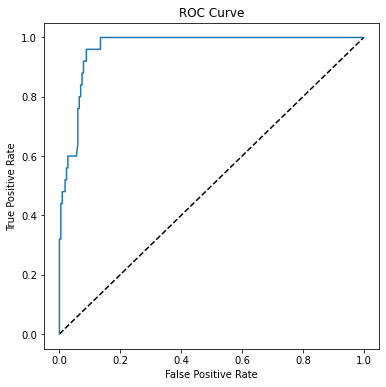

In [59]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [60]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9662325581395349


In [61]:
import joblib

# Save the model as a pickle file
filename = './Legendary_model.pkl'
joblib.dump(model, filename)

['./Legendary_model.pkl']

In [71]:
# Load the model from the file
model = joblib.load(filename)

# I will create an array with a single array of features, representing one pokemon
X_new = np.array([[100,60,80,70,50,90]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

print('Predicted class is {} \nTotal power your pokemon: {}'.format(pred, X_new.sum()))

New sample: [100, 60, 80, 70, 50, 90]
Predicted class is [False] 
Total power your pokemon: 450
